In [2]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from datetime import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, TimeDistributed, Bidirectional
from tensorflow.keras.models import model_from_json

2025-02-08 02:24:05.715087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-08 02:24:05.744887: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-08 02:24:05.744925: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-08 02:24:05.762620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-08 02:24:06.817687: W tensorflow/com

In [3]:
df = pd.read_csv("/home/ertugrulgul/Belgeler/GitHub/hakkari_test/data_H/Modellemeler/haftalıkveriler/hakkari.csv")

In [4]:
df['t2m'] = df['t2m'] - 273.15
df['tp'] = df['tp']*1000
df['sp'] = df['sp']/100
df["lat"] = df["latitude"]
df["lon"] = df["longitude"]

In [5]:
df.head()

,valid_time,latitude,longitude,number,expver,sp,u10,v10,t2m,tp,lat,lon
0,1940-01-01,37.79,43.31,0,1,743.2331,-0.022367,0.895051,-9.63218,3.649931,37.79,43.31
1,1940-01-01,37.79,43.56,0,1,738.1231,0.267427,0.899629,-9.96226,3.266792,37.79,43.56
2,1940-01-01,37.79,43.81,0,1,741.4831,0.536531,0.814057,-9.96810,2.750378,37.79,43.81
3,1940-01-01,37.79,44.06,0,1,747.8381,0.755526,0.678315,-9.95396,2.303939,37.79,44.06
4,1940-01-01,37.79,44.31,0,1,756.9931,0.824984,0.797151,-9.52866,1.858692,37.79,44.31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49931 entries, 0 to 49930
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   valid_time  49931 non-null  object 
 1   latitude    49931 non-null  float64
 2   longitude   49931 non-null  float64
 3   number      49931 non-null  int64  
 4   expver      49931 non-null  int64  
 5   sp          49931 non-null  float64
 6   u10         49931 non-null  float64
 7   v10         49931 non-null  float64
 8   t2m         49931 non-null  float64
 9   tp          49931 non-null  float64
 10  lat         49931 non-null  float64
 11  lon         49931 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


In [7]:
df.describe()

,latitude,longitude,number,expver,sp,u10,v10,t2m,tp,lat,lon
count,49931.000000,49931.000000,49931.0,49931.0,49931.000000,49931.000000,49931.000000,49931.000000,49931.000000,49931.000000,49931.000000
mean,37.040000,44.060000,0.0,1.0,856.072539,-0.079665,-0.101981,11.857726,2.324937,37.040000,44.060000
std,0.500005,0.500005,0.0,0.0,70.262460,0.521551,0.536482,11.170519,2.448767,0.500005,0.500005
min,36.290000,43.310000,0.0,1.0,733.314400,-1.893168,-1.862009,-15.085300,0.000000,36.290000,43.310000
25%,36.540000,43.560000,0.0,1.0,794.367825,-0.434193,-0.484273,2.975250,0.196071,36.540000,43.560000
50%,37.040000,44.060000,0.0,1.0,845.616900,-0.133927,-0.152884,11.676170,1.570288,37.040000,44.060000
75%,37.540000,44.560000,0.0,1.0,918.284400,0.240395,0.231908,20.518825,3.769358,37.540000,44.560000
max,37.790000,44.810000,0.0,1.0,987.033750,2.379473,1.873778,37.649560,15.525721,37.790000,44.810000


In [8]:
df.isna().sum()

valid_time    0
latitude      0
longitude     0
number        0
expver        0
sp            0
u10           0
v10           0
t2m           0
tp            0
lat           0
lon           0
dtype: int64

In [9]:
print(df.columns)

Index(['valid_time', 'latitude', 'longitude', 'number', 'expver', 'sp', 'u10',
       'v10', 't2m', 'tp', 'lat', 'lon'],
      dtype='object')


In [10]:
df['valid_time'] = pd.to_datetime(df['valid_time'])  # Tarih formatına çevir
df.set_index('valid_time', inplace=True)  # İndeks olarak ayarla
df = df.sort_index()  # Zaman sırasına göre sıralayın (bazı algoritmalar için önemli)

In [11]:
df.dtypes

latitude     float64
longitude    float64
number         int64
expver         int64
sp           float64
u10          float64
v10          float64
t2m          float64
tp           float64
lat          float64
lon          float64
dtype: object

In [12]:
print(type(df.index))  # İndeksin türünü kontrol et
print(df.index.dtype)  # İndeksin veri tipini kontrol et

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
datetime64[ns]


In [13]:
df_daily = df.resample('D').mean()
df_weekly = df.resample('W').mean()
df_month = df.resample('ME').mean()
df_year = df.resample ('YE').mean()

In [14]:
# Tarih aralıklarını kontrol et
print(df.index.min(), df.index.max())  # Veri setinin başlangıç ve bitiş tarihleri
print(df.index.to_series().diff().value_counts())  # Zaman aralıklarının düzenliliğini kontrol et

1940-01-01 00:00:00 2024-11-01 00:00:00
valid_time
0 days     48912
31 days      594
30 days      339
28 days       63
29 days       22
Name: count, dtype: int64


In [15]:
# Sayısal sütunları seç
numeric_cols = df.select_dtypes(include=["number"]).columns  # Sadece sayısal sütunlar

# Aykırı değerleri saklamak için boş bir DataFrame oluştur
outliers_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # İlk çeyrek
    Q3 = df[col].quantile(0.75)  # Üçüncü çeyrek
    IQR = Q3 - Q1  # Çeyrekler arası fark

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri filtrele
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers.empty:
        outliers_dict[col] = outliers

# Sonuçları kontrol et
for col, outliers in outliers_dict.items():
    print(f"\n📌 {col} sütununda {len(outliers)} aykırı değer bulundu:")
    print(outliers)


📌 u10 sütununda 534 aykırı değer bulundu:
            latitude  longitude  number  expver         sp       u10  \
valid_time                                                             
1940-05-01     37.79      44.31       0       1  762.87440  1.278461   
1940-05-01     37.54      44.56       0       1  780.08940  1.270435   
1940-05-01     37.29      44.81       0       1  796.45940  1.393848   
1940-12-01     37.79      44.31       0       1  761.32000  1.342197   
1940-12-01     37.79      44.56       0       1  786.54000  1.370578   
...              ...        ...     ...     ...        ...       ...   
2023-04-01     37.29      44.81       0       1  795.02690  1.554994   
2023-04-01     37.04      44.81       0       1  814.93690  1.305055   
2023-11-01     37.79      44.31       0       1  763.89000  1.304797   
2023-11-01     37.29      44.81       0       1  798.10500  1.348620   
2024-08-01     36.29      43.31       0       1  965.86875  1.307281   

                 v10

In [16]:
# Sayısal sütunları seç
numeric_cols = df.select_dtypes(include=["number"]).columns  # Sadece sayısal sütunlar

# Aykırı değerleri saklamak için boş bir DataFrame oluştur
outliers_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # İlk çeyrek
    Q3 = df[col].quantile(0.75)  # Üçüncü çeyrek
    IQR = Q3 - Q1  # Çeyrekler arası fark

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri filtrele
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers.empty:
        outliers_dict[col] = outliers

# Sonuçları kontrol et
for col, outliers in outliers_dict.items():
    print(f"\n📌 {col} sütununda {len(outliers)} aykırı değer bulundu:")
    print(outliers)


📌 u10 sütununda 534 aykırı değer bulundu:
            latitude  longitude  number  expver         sp       u10  \
valid_time                                                             
1940-05-01     37.79      44.31       0       1  762.87440  1.278461   
1940-05-01     37.54      44.56       0       1  780.08940  1.270435   
1940-05-01     37.29      44.81       0       1  796.45940  1.393848   
1940-12-01     37.79      44.31       0       1  761.32000  1.342197   
1940-12-01     37.79      44.56       0       1  786.54000  1.370578   
...              ...        ...     ...     ...        ...       ...   
2023-04-01     37.29      44.81       0       1  795.02690  1.554994   
2023-04-01     37.04      44.81       0       1  814.93690  1.305055   
2023-11-01     37.79      44.31       0       1  763.89000  1.304797   
2023-11-01     37.29      44.81       0       1  798.10500  1.348620   
2024-08-01     36.29      43.31       0       1  965.86875  1.307281   

                 v10

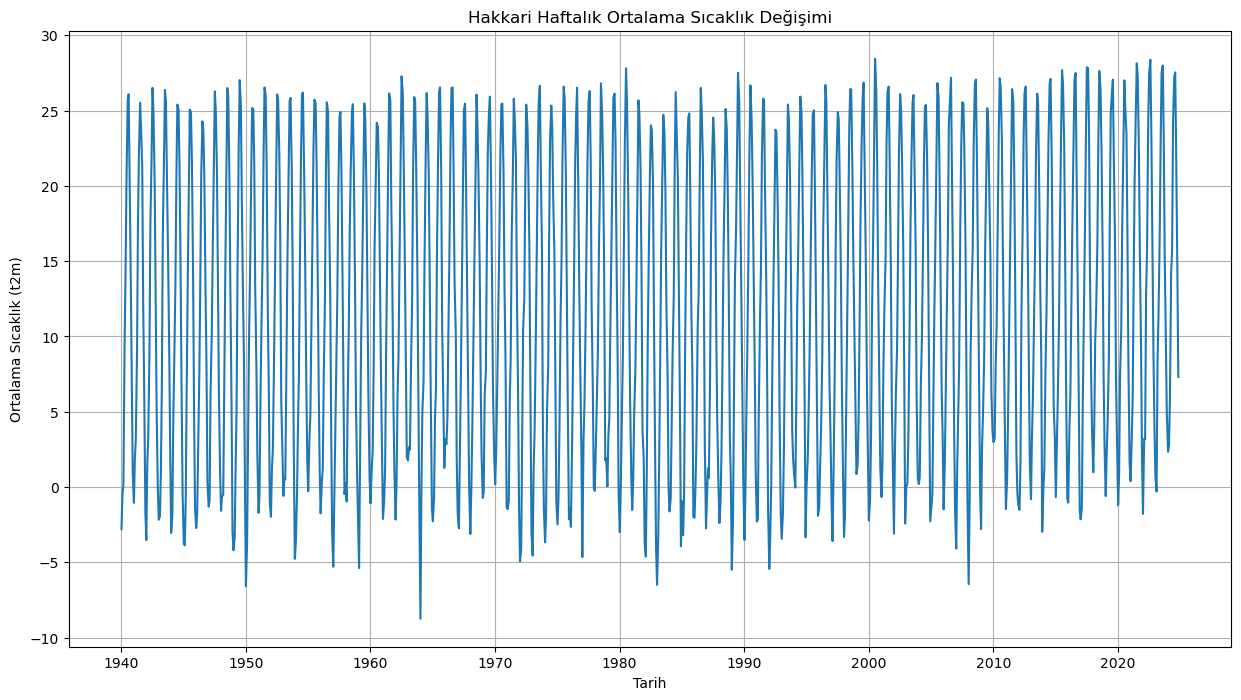

In [17]:
plt.figure(figsize=(15, 8))  # Doğru yazım
sns.lineplot(y='t2m', x='valid_time', data=df_weekly)  # Parantez düzgün kapatıldı
plt.xlabel("Tarih")
plt.ylabel("Ortalama Sıcaklık (t2m)")
plt.title("Hakkari Haftalık Ortalama Sıcaklık Değişimi")
plt.grid(True)
plt.show()


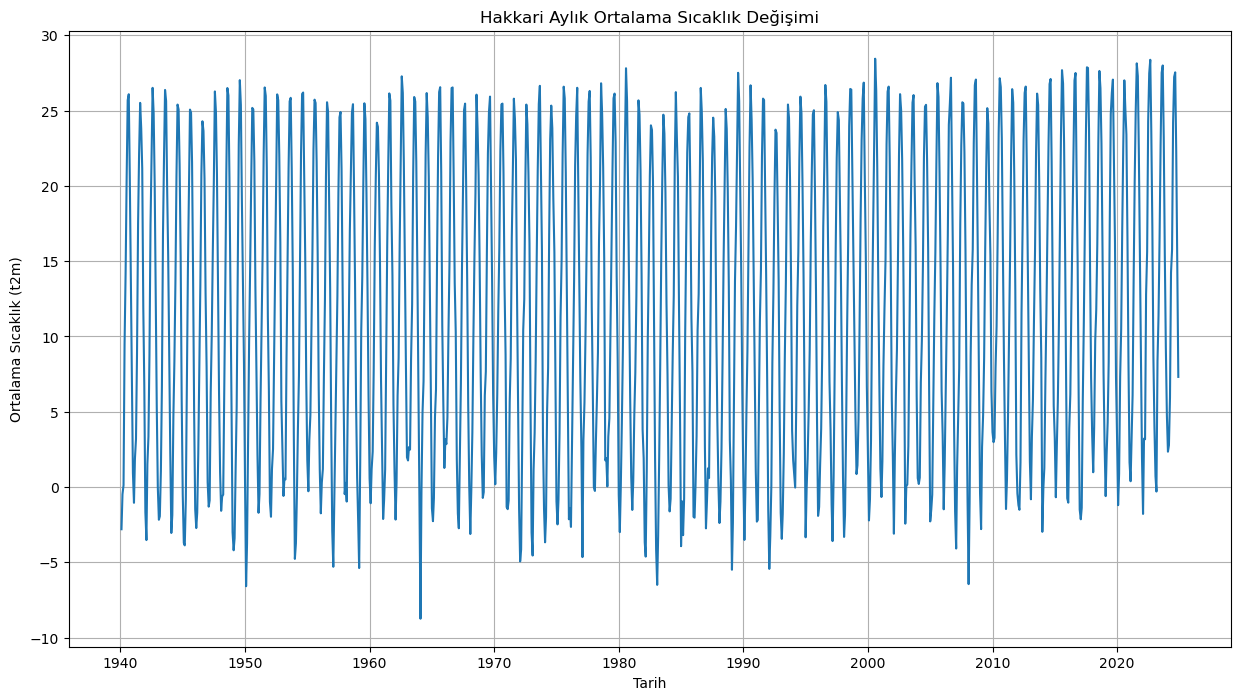

In [18]:
plt.figure(figsize=(15, 8))  # Doğru yazım
sns.lineplot(y='t2m', x='valid_time', data=df_month)  # Parantez düzgün kapatıldı
plt.xlabel("Tarih")
plt.ylabel("Ortalama Sıcaklık (t2m)")
plt.title("Hakkari Aylık Ortalama Sıcaklık Değişimi")
plt.grid(True)
plt.show()

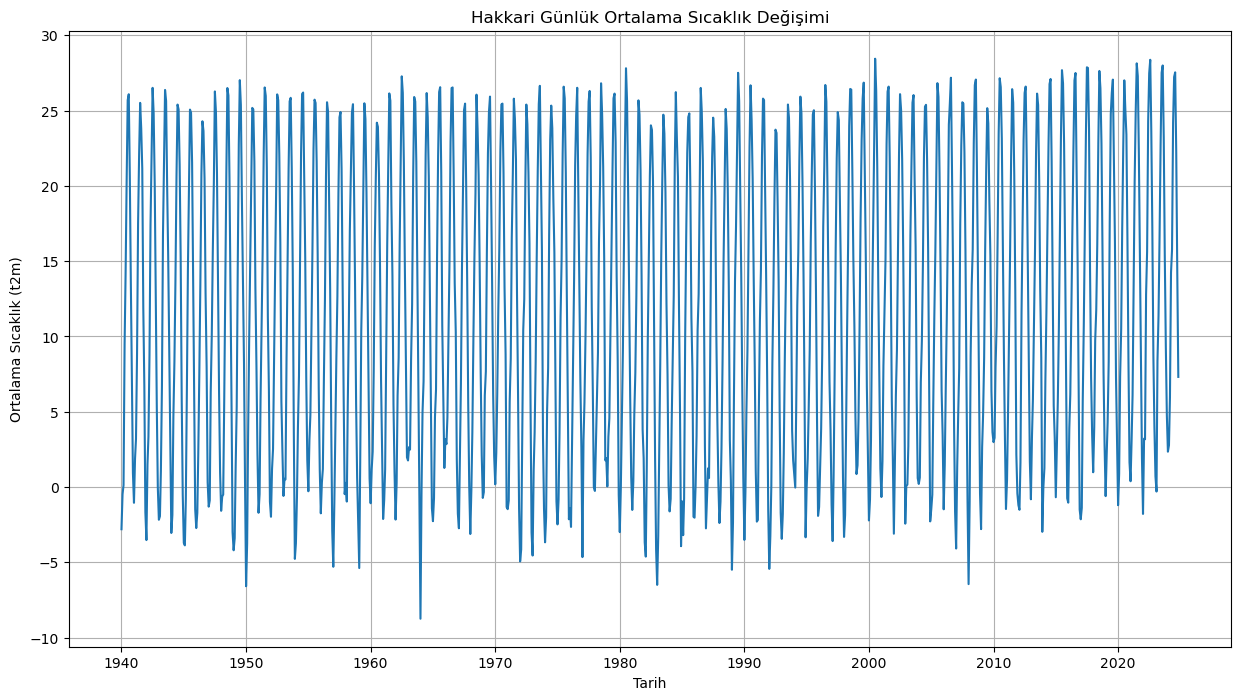

In [19]:
plt.figure(figsize=(15, 8))  # Doğru yazım
sns.lineplot(y='t2m', x='valid_time', data=df_daily)  # Parantez düzgün kapatıldı
plt.xlabel("Tarih")
plt.ylabel("Ortalama Sıcaklık (t2m)")
plt.title("Hakkari Günlük Ortalama Sıcaklık Değişimi")
plt.grid(True)
plt.show()

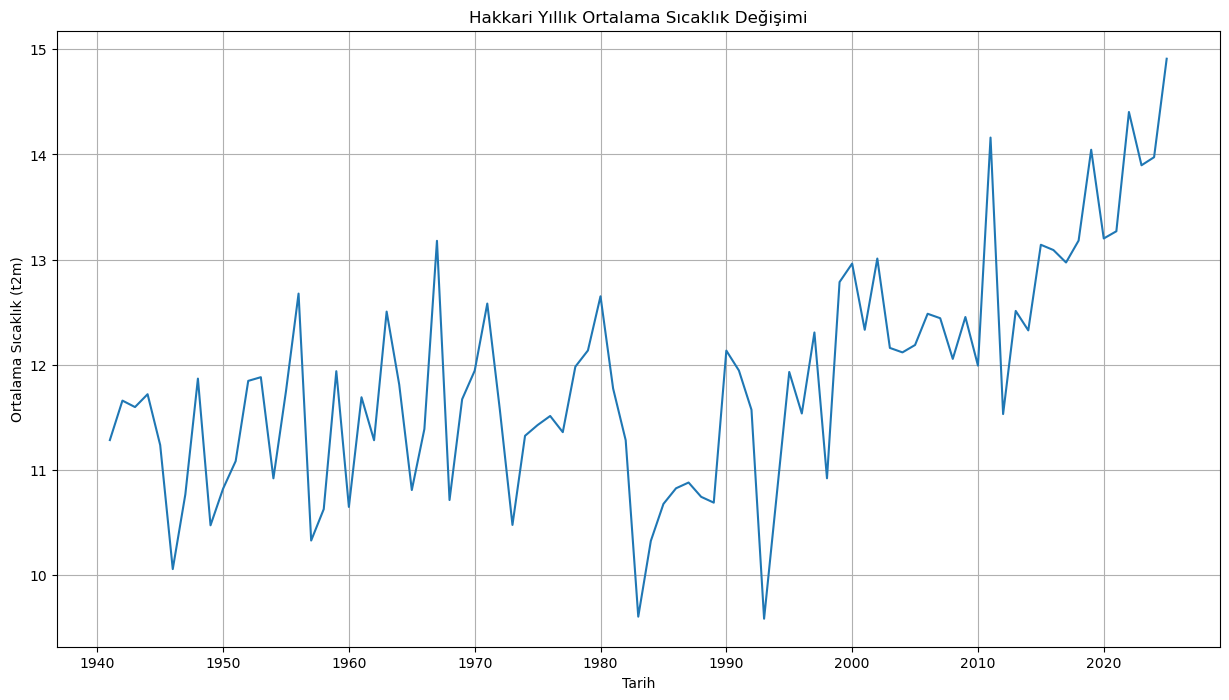

In [20]:
plt.figure(figsize=(15, 8))  # Doğru yazım
sns.lineplot(y='t2m', x='valid_time', data=df_year)  # Parantez düzgün kapatıldı
plt.xlabel("Tarih")
plt.ylabel("Ortalama Sıcaklık (t2m)")
plt.title("Hakkari Yıllık Ortalama Sıcaklık Değişimi")
plt.grid(True)
plt.show()

In [21]:
df_daily.to_csv("df_daily.csv")
df_weekly.to_csv("df_weekly.csv")
df_month.to_csv("df_month.csv")
df_year.to_csv("df_year.csv")